In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf

In [2]:
%%bash

plink \
  --vcf /Users/cmdb/qbb2020-answers/quantlab3/BYxRM_segs_saccer3.bam.simplified.vcf \
  --pca \
  --mind \
  --allow-extra-chr

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-extra-chr
  --mind
  --pca
  --vcf /Users/cmdb/qbb2020-answers/quantlab3/BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 4 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%2

In [3]:
%%bash
head plink.eigenvec

A01 01 0.0353455 0.0121191 0.0203633 0.0369758 -0.00371816 0.0383015 0.0280454 -0.00718582 0.0552279 4.30173e-05 -0.00998784 -0.00984027 -0.000946717 0.0163578 0.0189659 0.0449926 0.0187722 0.0251466 -0.0387737 0.0142384
A01 02 -0.0203733 -0.0115301 -0.00871792 -0.0703994 -0.0506287 0.0450617 -0.0699031 -0.0143431 0.0238492 0.0270039 0.0141224 0.00332691 -0.0039757 -0.0208873 -0.0326634 -0.0172422 0.0159907 -0.00790786 0.00872536 0.0139886
A01 03 -0.0172656 -0.00806361 -0.0522656 -0.0388474 -0.0382605 0.0282452 0.0462828 0.008466 0.00314205 -0.0309712 0.0150524 -0.00243935 -0.0487502 0.0479302 -0.0321832 0.00460651 -0.016738 0.00343947 -0.0637942 -0.0349545
A01 04 0.0207922 -0.0744735 -0.00745026 0.00797909 0.013607 0.02267 -0.0246187 0.0353385 -0.032396 -0.0188403 0.000669337 -0.00559284 0.00685793 0.0256263 0.0122854 0.0577782 0.021666 -0.0418856 0.0019378 -0.0437749
A01 05 -0.0319175 0.0685914 0.0250888 -0.00833838 0.0164201 0.0101749 0.0096589 -0.0512051 -0.0323806 0.030435 -0.0067

In [4]:
pca_output = pd.read_csv('plink.eigenvec', sep = ' ', header = None)
pca_output.columns = ['FID', 'SID' , 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20']
pca_output

,FID,SID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,A01,1,0.035345,0.012119,0.020363,0.036976,-0.003718,0.038301,0.028045,-0.007186,...,-0.009988,-0.009840,-0.000947,0.016358,0.018966,0.044993,0.018772,0.025147,-0.038774,0.014238
1,A01,2,-0.020373,-0.011530,-0.008718,-0.070399,-0.050629,0.045062,-0.069903,-0.014343,...,0.014122,0.003327,-0.003976,-0.020887,-0.032663,-0.017242,0.015991,-0.007908,0.008725,0.013989
2,A01,3,-0.017266,-0.008064,-0.052266,-0.038847,-0.038261,0.028245,0.046283,0.008466,...,0.015052,-0.002439,-0.048750,0.047930,-0.032183,0.004607,-0.016738,0.003439,-0.063794,-0.034954
3,A01,4,0.020792,-0.074473,-0.007450,0.007979,0.013607,0.022670,-0.024619,0.035339,...,0.000669,-0.005593,0.006858,0.025626,0.012285,0.057778,0.021666,-0.041886,0.001938,-0.043775
4,A01,5,-0.031918,0.068591,0.025089,-0.008338,0.016420,0.010175,0.009659,-0.051205,...,-0.006765,-0.012257,0.014609,-0.034157,-0.011838,0.025975,0.009821,0.030508,-0.011105,0.034869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,A11,92,0.028258,0.029521,0.073246,0.007986,-0.023496,0.002155,-0.015471,-0.016469,...,-0.034350,-0.016404,-0.033016,0.025895,0.022025,0.021827,-0.000942,-0.013724,0.036798,0.037410
947,A11,93,-0.013469,-0.003927,-0.047575,-0.030728,-0.045670,0.016102,-0.035031,-0.048079,...,-0.007580,-0.020664,-0.011800,0.022192,0.014543,0.014683,-0.002665,-0.009335,0.020004,0.001750
948,A11,94,-0.000906,0.063399,0.005936,-0.000015,0.007514,-0.045466,0.020304,-0.008391,...,0.082074,0.032907,-0.035074,0.058970,0.040479,-0.038558,0.029731,-0.057467,-0.015875,-0.017111
949,A11,95,-0.002879,0.053984,0.013385,-0.003550,0.038551,-0.045108,0.005051,0.003467,...,0.010656,-0.029883,-0.024035,0.025607,-0.015668,0.012360,0.011888,0.017862,0.030352,0.055357


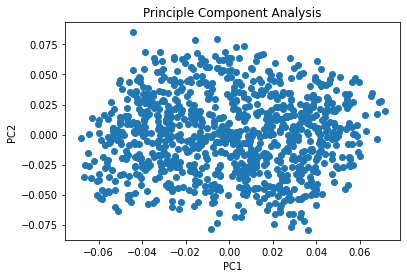

In [5]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output['PC1'], y = pca_output['PC2'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Principle Component Analysis')
plt.show()

In [13]:
file = open('./BYxRM_segs_saccer3.bam.simplified.vcf', 'r')
af = []
for line in file:
    if line[0] is '#':
        continue
    else:
        info = line.split('\t')
        AF = info[7][3:]
        af.append(AF)
af2 = []
for item in af:
    if ',' in item:
    #split on ',' for items with multiple values
        sep = item.split(',')
        #extract each value separately and append to a list
        val1 = float(sep[0])
        val2 = float(sep[1])
        af2.append(val1)
        af2.append(val2)           
    else:
        val3 = float(item)
        af2.append(val3)
#print(af2)        
file.close()    
        

[0.690206, 0.710472, 0.565776, 0.503932, 0.712679, 0.713408, 0.695903, 0.493498, 0.496109, 0.5215, 0.529564, 0.524582, 0.518839, 0.522523, 0.519038, 0.540366, 0.536523, 0.528079, 0.52593, 0.522124, 0.530378, 0.515259, 0.536906, 0.525758, 0.528246, 0.530303, 0.527832, 0.519578, 0.537856, 0.532875, 0.530969, 0.534449, 0.531746, 0.542487, 0.533129, 0.538038, 0.519527, 0.533438, 0.532022, 0.533777, 0.53719, 0.531, 0.521161, 0.524465, 0.520813, 0.525077, 0.524341, 0.530969, 0.526367, 0.532321, 0.52997, 0.53656, 0.52704, 0.524823, 0.52071, 0.520854, 0.527944, 0.481481, 0.520098, 0.518868, 0.521973, 0.52359, 0.524029, 0.524898, 0.532325, 0.531414, 0.517734, 0.516256, 0.520568, 0.519704, 0.520588, 0.515764, 0.519763, 0.513444, 0.514028, 0.520876, 0.526052, 0.527641, 0.516333, 0.524327, 0.519677, 0.523303, 0.514811, 0.517188, 0.514736, 0.509585, 0.5143, 0.512, 0.515984, 0.51769, 0.525, 0.516899, 0.518299, 0.531828, 0.520387, 0.524024, 0.524462, 0.521078, 0.517751, 0.526183, 0.521717, 0.530938, 

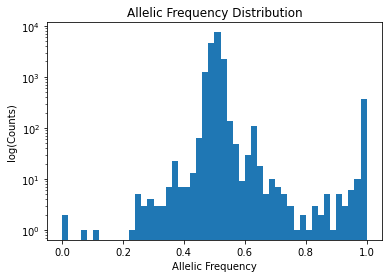

In [18]:
fig, ax = plt.subplots()
ax.hist(x= af2, bins = 50)
ax.set_yscale('log')
ax.set_xlabel('Allelic Frequency')
ax.set_ylabel('log(Counts)')
ax.set_title('Allelic Frequency Distribution')
plt.show()

In [24]:
phenotypes = pd.read_csv('./BYxRM_PhenoData.txt', sep = '\t')
phenotypes
    
    

,Unnamed: 0,Cadmium_Chloride,Caffeine,Calcium_Chloride,Cisplatin,Cobalt_Chloride,Congo_red,Copper,Cycloheximide,Diamide,...,x6-Azauracil,Xylose,YNB,YNB:ph3,YNB:ph8,YPD,YPD:15C,YPD:37C,YPD:4C,Zeocin
0,A01_01,-7.323520,0.279993,0.313118,1.658179,-1.604442,5.841617,-4.130950,0.821226,3.622602,...,1.199054,-0.309149,17.470822,0.055225,-0.184268,24.548971,0.712171,0.890842,4.118372,8.592818
1,A01_02,-8.098236,-0.206326,-0.534844,-0.918012,0.892198,-1.618172,1.131947,-0.764736,-2.946279,...,0.443182,0.697908,18.052925,0.283462,1.662201,26.808476,-1.522498,0.006062,0.066515,-4.220476
2,A01_03,7.605720,-0.127960,-0.311102,-2.712088,3.301709,-6.680571,-1.138056,-3.382532,-3.157866,...,1.472629,1.474329,18.163782,-0.951379,0.369565,26.183975,1.082289,1.723157,5.714088,-6.506519
3,A01_04,-6.147649,0.878392,-0.563331,-0.827358,-1.291270,2.753851,-2.268121,0.867456,-6.832079,...,0.054694,-0.739040,15.575856,-1.690867,-0.840344,20.893646,-0.636280,0.053258,-3.196936,0.294462
4,A01_05,9.379060,-1.353169,0.405204,-1.137234,4.260286,-7.391216,-3.222742,1.586376,1.048391,...,0.267463,0.959138,17.808444,0.127621,1.967267,28.621507,-3.720999,-0.768724,-4.002786,7.045575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,A11_92,-4.262720,-0.893290,-0.329504,0.257061,-3.120957,2.556543,2.567092,2.054232,1.672347,...,0.232614,1.130568,16.629005,0.531583,NaN,23.520842,0.159946,-5.158120,-0.090273,-7.030154
1004,A11_93,-10.147285,1.145573,0.048948,-1.089350,0.539833,2.720952,-3.445357,0.891066,3.003684,...,-0.317916,1.977915,15.687951,-0.098451,NaN,21.553930,2.977722,-1.913176,4.279626,-4.650492
1005,A11_94,NaN,0.321844,NaN,1.016712,1.801923,-4.157083,-0.097598,-1.954080,-1.739499,...,-1.698334,1.363267,17.357844,0.390511,NaN,23.977236,0.078992,1.801422,NaN,-0.499069
1006,A11_95,NaN,-1.001507,NaN,0.004191,4.675717,-10.240998,1.244410,-0.810857,2.305318,...,0.259829,0.942454,17.098753,-0.432459,NaN,22.927686,-0.254905,-1.747526,NaN,-7.435961


In [46]:
file = open('./BYxRM_PhenoData.txt', 'r')
FID= []
SID = []
for line in file:
    sep = line.split('\t')
    col1= sep[0][0:3]
    FID.append(col1)
    col2= sep[0][4:]
    SID.append(col2)
FID.pop(0)
SID.pop(0)
#print(FID)
#print(SID)

    

''

In [56]:
phenotypes['FID'] = FID
phenotypes['SID'] = SID
phenotypes = phenotypes.iloc[:, 1:]
phenotypes

,Calcium_Chloride,Cisplatin,Cobalt_Chloride,Congo_red,Copper,Cycloheximide,Diamide,E6_Berbamine,Ethanol,Formamide,...,YNB,YNB:ph3,YNB:ph8,YPD,YPD:15C,YPD:37C,YPD:4C,Zeocin,FID,SID
0,0.313118,1.658179,-1.604442,5.841617,-4.130950,0.821226,3.622602,-0.378747,-0.644954,0.736772,...,17.470822,0.055225,-0.184268,24.548971,0.712171,0.890842,4.118372,8.592818,A01,01
1,-0.534844,-0.918012,0.892198,-1.618172,1.131947,-0.764736,-2.946279,-2.475193,-0.203038,-0.661086,...,18.052925,0.283462,1.662201,26.808476,-1.522498,0.006062,0.066515,-4.220476,A01,02
2,-0.311102,-2.712088,3.301709,-6.680571,-1.138056,-3.382532,-3.157866,-4.178616,-0.100542,0.203810,...,18.163782,-0.951379,0.369565,26.183975,1.082289,1.723157,5.714088,-6.506519,A01,03
3,-0.563331,-0.827358,-1.291270,2.753851,-2.268121,0.867456,-6.832079,-1.970630,-1.728767,0.778726,...,15.575856,-1.690867,-0.840344,20.893646,-0.636280,0.053258,-3.196936,0.294462,A01,04
4,0.405204,-1.137234,4.260286,-7.391216,-3.222742,1.586376,1.048391,-3.971730,0.815289,-0.221059,...,17.808444,0.127621,1.967267,28.621507,-3.720999,-0.768724,-4.002786,7.045575,A01,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,-0.329504,0.257061,-3.120957,2.556543,2.567092,2.054232,1.672347,5.465978,-0.452469,-0.557846,...,16.629005,0.531583,NaN,23.520842,0.159946,-5.158120,-0.090273,-7.030154,A11,92
1004,0.048948,-1.089350,0.539833,2.720952,-3.445357,0.891066,3.003684,-1.667592,-2.995565,1.228866,...,15.687951,-0.098451,NaN,21.553930,2.977722,-1.913176,4.279626,-4.650492,A11,93
1005,NaN,1.016712,1.801923,-4.157083,-0.097598,-1.954080,-1.739499,-6.520551,NaN,-1.802024,...,17.357844,0.390511,NaN,23.977236,0.078992,1.801422,NaN,-0.499069,A11,94
1006,NaN,0.004191,4.675717,-10.240998,1.244410,-0.810857,2.305318,9.321186,NaN,-0.775528,...,17.098753,-0.432459,NaN,22.927686,-0.254905,-1.747526,NaN,-7.435961,A11,95


In [59]:
phenotypes.to_csv('phenotypes.txt', index = False, sep = '\t')

In [64]:
%%bash
plink \
  --vcf ./BYxRM_segs_saccer3.bam.simplified.vcf \
  --pheno ./phenotypes.txt \
  --assoc \
  --allow-no-sex \
  --allow-extra-chr \
  --covar plink.eigenvec \
  --covar-number 1-10

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-extra-chr
  --allow-no-sex
  --assoc
  --covar plink.eigenvec
  --covar-number 1-10
  --pheno ./phenotypes.txt
  --vcf ./BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .


Error: Line 790 of --pheno file has fewer tokens than expected.
